Estadísticos de Orden
===

* 0:00 min | Última modificación: Ocutbre 15, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Definición del problema 

El [conjunto de datos de la flor Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 150 muestras de las medidas del ancho y el largo del pétalo y del sépalo para las tres especies de esta flor (Iris setosa, Iris virginica e Iris versicolor). A partir de la muestra de datos se desean responder la siguiente pregunta:


* **P2**.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

## Carga de datos

In [3]:
#
# Se cargan los datos y se realiza una inspección
# inicial de la tabla y los datos
#
iris = sns.load_dataset('iris')

display(
    iris.head(),
    iris.tail()
)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

## P2.--- ¿Cuál es el rango típico de la longitud y ancho del pétalo y del sépalo para cada uno de los tipos de flores?

**Estadísticos de orden:** Métricas calculadas sobre los datos ordenados.

* **Percentil** $p$: Valor para el cual el $p$ por ciento de los datos son menores o iguales. 

* **decil** $d$: Valor para el cual el $d$ por ciento de los datos son menores o iguales. $d$ es un múltiplo de 10.

* **Cuartil inferior:** Valor para el cual el 25% de las observaciones son más pequeñas (percentil del 25%).

* **Cuartil superior:** Valor para el cual el 25% de las observaciones son más grandes (percentil del 75%).

* **Rango intercuartil (IQR):**

$$\text{IQR} = \text{Cuartil superior} - \text{Cuartil inferior}$$

In [4]:
#
# Cálculo de cuartiles
#
display(
    iris.quantile(0.25),
    iris.quantile(0.75)
)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64

In [5]:
iris.groupby("species").quantile(0.25)

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             4.800        3.200           1.4          0.2
versicolor         5.600        2.525           4.0          1.2
virginica          6.225        2.800           5.1          1.8

In [6]:
iris.groupby("species").quantile(0.75)

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.2        3.675         1.575          0.3
versicolor           6.3        3.000         4.600          1.5
virginica            6.9        3.175         5.875          2.3

In [7]:
iris.groupby("species").quantile(0.75)

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.2        3.675         1.575          0.3
versicolor           6.3        3.000         4.600          1.5
virginica            6.9        3.175         5.875          2.3

In [8]:
iris.groupby("species").quantile(0.75) - iris.groupby("species").quantile(0.25)

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             0.400        0.475         0.175          0.1
versicolor         0.700        0.475         0.600          0.3
virginica          0.675        0.375         0.775          0.5

In [9]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [10]:
for column in iris._get_numeric_data().columns:
    print(column)
    print(iris.groupby("species")[column].describe())
    print("")

sepal_length
            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

sepal_width
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

petal_length
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

petal_width
  

In [11]:
#
# El método describe de pandas computa los 
# principales estadísticos para las columnas
# numéricas del dataframe
#
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

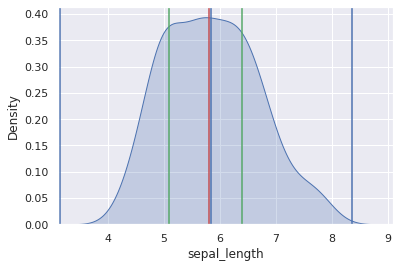

In [12]:
descriptive_stats = iris.sepal_length.describe()

q75 = iris.sepal_length.describe()['75%']
q25 = iris.sepal_length.describe()['25%']
iqr = q75 - q25

upper_outliers = q75 + 1.5 * iqr
lower_outliers = q25 - 1.5 * iqr

sns.set(color_codes=True)

sns.kdeplot(iris['sepal_length'], shade=True)
plt.axvline(iris.sepal_length.mean())
plt.axvline(iris.sepal_length.median(), color='r')
plt.axvline(q25, color='g')
plt.axvline(q75, color='g')
plt.axvline(upper_outliers, color = 'b')
plt.axvline(lower_outliers, color = 'b')
plt.show()

**Medidas de forma**

In [13]:
from scipy.stats import skew

display(
    iris.sepal_length.skew(),
    skew(iris.sepal_length),
)

0.3149109566369728

0.3117530585022963

In [14]:
from scipy.stats import kurtosis

display(
    iris.sepal_length.kurt(),
    kurtosis(iris.sepal_length),
)

-0.5520640413156395

-0.5735679489249765